
<nav class="navbar navbar-default">
  <div class="container-fluid">
    <div class="navbar-header" style="float: left">
        <a class="navbar-brand" href="0_Forside.ipynb" target="_self"> <h2> &uarr; Tilbake til forsiden</h2></a>
    </div>
  </div>
</nav>

# Dataanalyse: nedbørsdata

**Læringsmål:**

* Praktisk bruk av løkker i dataanalyse

**Oversikt:**
* [Oppgave a) Totalt nedbør i mm](#oppg_7a)
* [Oppgave b) Antall regnværsdager](#oppg_7b)

Vedlagt denne øvingen er en `.csv`-fil med nedbørsdata fra Ålesund for kalenderåret 2023. Dataen er hentet fra [https://seklima.met.no/](https://seklima.met.no/). Nedbørsdataen er i tabellform og kan inspiseres ved å [åpne filen 
table.csv](table.csv). Vi skal i denne oppgaven bruke det vi har lært om oppsamlingsløkker til å utføre litt enkel analyse av nedbørsdataen.<br> PS: Løsningene fra oppgave **6** kan kommme godt med her.

Men først skal vi bruke python til å bli litt bedre kjent med datasettet. Merk at det ***ikke*** er forventet at dere skal gjøre noe mer enn å kjøre de neste to kodecellene, da den hovedsakelig er ment for å gi starthjelp til en programmeringsoppgave som bruker data fra den virkelige verden.

### Innlasting av datasett
Det aller første vi trenger å gjøre er å lese inn dataen med Python. Kodecellen nedenfor vil laste inn nedbørsdata ved hjelp av funksjonen [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) i modulen [pandas](https://pandas.pydata.org/docs/user_guide/10min.html). 
Deretter konverteres de interessante kolonnene til lister, slik at dataen nå er lagret i en datatype vi kjenner til., samt lage et plot av nedbørsdataen som et stolpediagram. Plottet er her hovedsakelig for å illustrere, vi skal ikke jobbe spesifikkt med plotting i denne oppgaven. 

In [1]:
# Importer biblioteker
import pandas as pd

# Hent data fra fil
df = pd.read_csv("Data/nedborsdata.csv", delimiter=";", decimal=",") # Kolonner separert med semikolon (;), desimaltegn er lik komma (,)
rain_values = list(pd.to_numeric(df["Nedbør (døgn)"]))
dates = list(df["Tid(norsk normaltid)"])

### Plotting av datasett

Plotting av datasett er ofte en sentral del av dataanalyse. Kodecellen nedenfor lager et stolpediagram basert på datasettet 

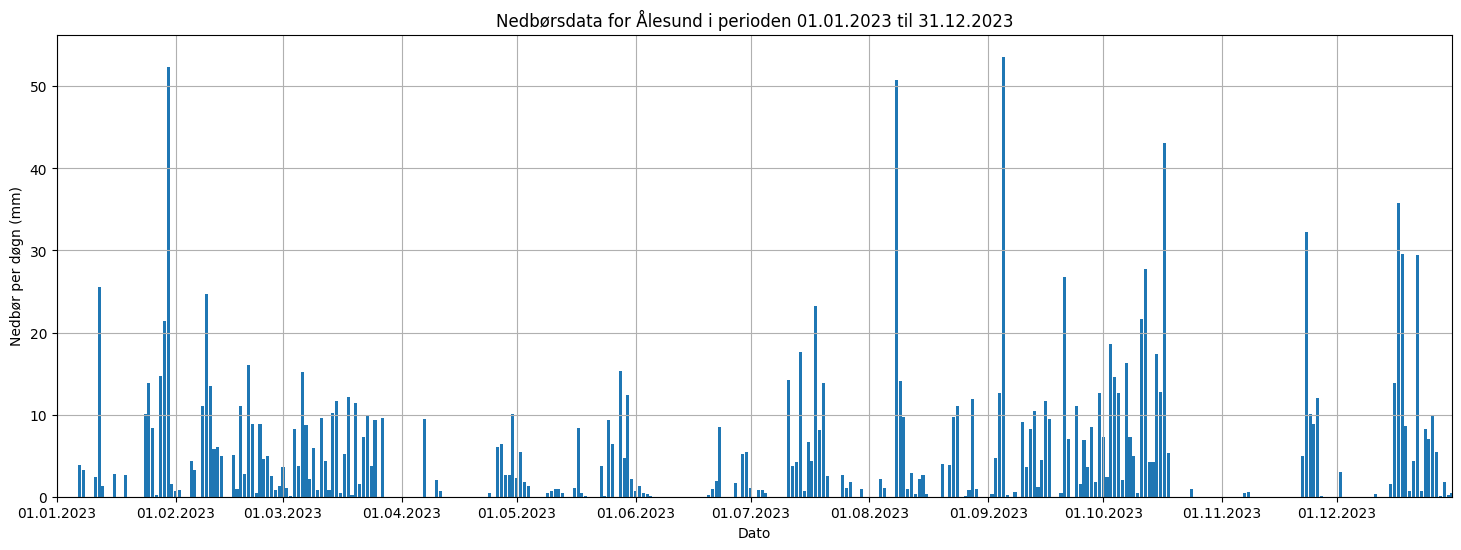

In [2]:
# Importer biblioteker
import numpy as np
import matplotlib.pyplot as plt

# Plot nedbørsdataen i en stor figur som et stolpediagram
plt.figure(figsize=(18,6)) # Lag ny figur
plt.bar(np.arange(len(rain_values)), rain_values) # Tegn stolpediagram

# Pynt på figuren 
# P.S: det er ikke forventet at du har kontroll på alt som skjer i linjene nedenfor!
plt.title(f"Nedbørsdata for Ålesund i perioden {dates[0]} til {dates[-1]}")
plt.ylabel("Nedbør per døgn (mm)")
plt.xlabel("Dato")
plt.xlim([0, len(rain_values)-1])
plt.grid(True)
xticks = np.where([date[0:2]=='01' for date in dates])[0] # Lag en array med indeksverdier for første dag i hver måned
xticklabels = [dates[i] for i in xticks] # Lag en liste med datostrengene kun for første dag i hver måned
plt.xticks(xticks, labels = xticklabels); # Angi merkepunkt langs x-aksen, og gi punktene datoer som merkelapp

Daten vi er interessert i for denne oppgaven er samlet i variabelen `rain_values`, som er en liste med lengde lik 365 element, hvor hvert element `rain_values[index]` er et mål på antall millimeter nedbør som fant sted på datoen `dates[index]`.


<a id="oppg_7a"></a>
## a)
Bruk for-løkker til å regne ut total mengde nedbør i Ålesund det siste året, og skriv ut resultatet med `print()`.

In [4]:
sum_rain = 0
for rain in rain_values:
    sum_rain += rain
print(f"Samlet nedbør i Ålesund i perioden {dates[0]} til {dates[-1]}: {sum_rain}mm")

Samlet nedbør i Ålesund i perioden 01.01.2023 til 31.12.2023: 1524.5999999999997mm


Eksempel på hvordan utskriften kan se ut (minus de korrekte tallverdiene):

`Samlet nedbør i Ålesund i perioden 01.09.2022 til 31.08.2023: ____mm` 

<a id="oppg_7b"></a>
## b)
Regn ut hvor mange regnværsdager det har vært i Ålesund det siste året, og skriv ut resultatet med `print() `. I denne oppgaven regner vi en dag som en regnværsdag dersom det har vært $> 0.4$mm nedbør i løpet av døgnet (dvs. mer nedbør enn hva som er tillatt i kategorien ["Stort sett oppholdsvær"](https://www.met.no/vaer-og-klima/begreper-i-vaervarsling)).

In [5]:
count_rainy_days = 0
for rain in rain_values:
    if rain > 0.4:
        count_rainy_days += 1
print(f"Det var {count_rainy_days} regnværsdager i Ålesund i perioden {dates[0]} til {dates[-1]}.")

Det var 189 regnværsdager i Ålesund i perioden 01.01.2023 til 31.12.2023.


Eksempel på hvordan utskriften kan se ut (minus de korrekte tallverdiene):

`Det var ____ regnværsdager i Ålesund i perioden 01.09.2022 til 31.08.2023.`

<br>
<nav class="navbar navbar-default">
        <div class="container-fluid">
            <div class="navbar-header" style="float: left">
                <a class="navbar-brand" href="6_Mer_om_lokker.ipynb" target="_self">&lt; Forrige side: <i>mer om løkker</i></a>
                </div>
            <div class="navbar-header" style="float: right">
                <a class="navbar-brand" href="8_Fakultet.ipynb" target="_self">Neste side: <i>fakultet</i> &gt;</a>
            </div>
        </div>
</nav>